In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

In [2]:
# Define image size and channels
IMAGE_SIZE = 512
CHANNELS = 3

In [3]:
# Data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 18345 images belonging to 10 classes.


In [4]:
# Validation data generator (assuming 'val' directory exists with validation data)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    'valid',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)


Found 4601 images belonging to 10 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'valid',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 4601 images belonging to 10 classes.


In [6]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(train_generator.class_indices)

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(
    train_generator,
    epochs=11,
    validation_data=val_generator
)

Epoch 1/11


C:\Users\raksh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


574/574 ━━━━━━━━━━━━━━━━━━━━ 5627s 10s/step - accuracy: 0.3940 - loss: 1.6430 - val_accuracy: 0.7270 - val_loss: 0.7913
Epoch 2/11
574/574 ━━━━━━━━━━━━━━━━━━━━ 5492s 9s/step - accuracy: 0.7793 - loss: 0.6310 - val_accuracy: 0.8468 - val_loss: 0.4274
Epoch 3/11
574/574 ━━━━━━━━━━━━━━━━━━━━ 5441s 9s/step - accuracy: 0.8467 - loss: 0.4188 - val_accuracy: 0.8027 - val_loss: 0.5494
Epoch 4/11
574/574 ━━━━━━━━━━━━━━━━━━━━ 5378s 9s/step - accuracy: 0.8779 - loss: 0.3482 - val_accuracy: 0.9068 - val_loss: 0.2655
Epoch 5/11
574/574 ━━━━━━━━━━━━━━━━━━━━ 5402s 9s/step - accuracy: 0.9085 - loss: 0.2607 - val_accuracy: 0.9291 - val_loss: 0.2152
Epoch 6/11
574/574 ━━━━━━━━━━━━━━━━━━━━ 5466s 9s/step - accuracy: 0.9217 - loss: 0.2220 - val_accuracy: 0.9276 - val_loss: 0.2175
Epoch 7/11
574/574 ━━━━━━━━━━━━━━━━━━━━ 5593s 10s/step - accuracy: 0.9399 - loss: 0.1731 - val_accuracy: 0.9207 - val_loss: 0.2469
Epoch 8/11
574/574 ━━━━━━━━━━━━━━━━━━━━ 5566s 10s/step - accuracy: 0.9489 - loss: 0.1468 - val_accu

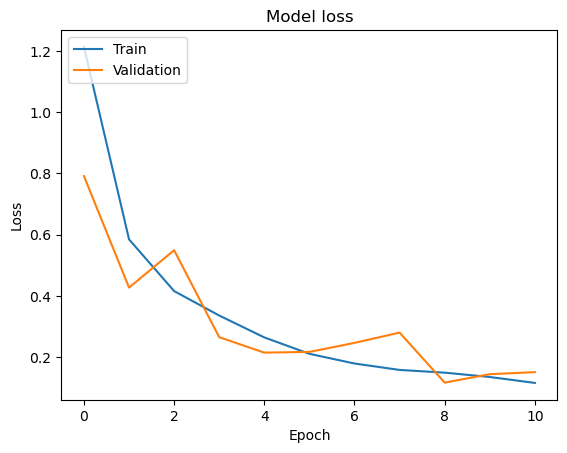

In [8]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [9]:
class_names = list(train_generator.class_indices.keys())

In [10]:
# Assuming you have defined 'test_generator' similar to train_generator and val_generator
# Predict function and test set visualization (assuming 'class_names' is defined)
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


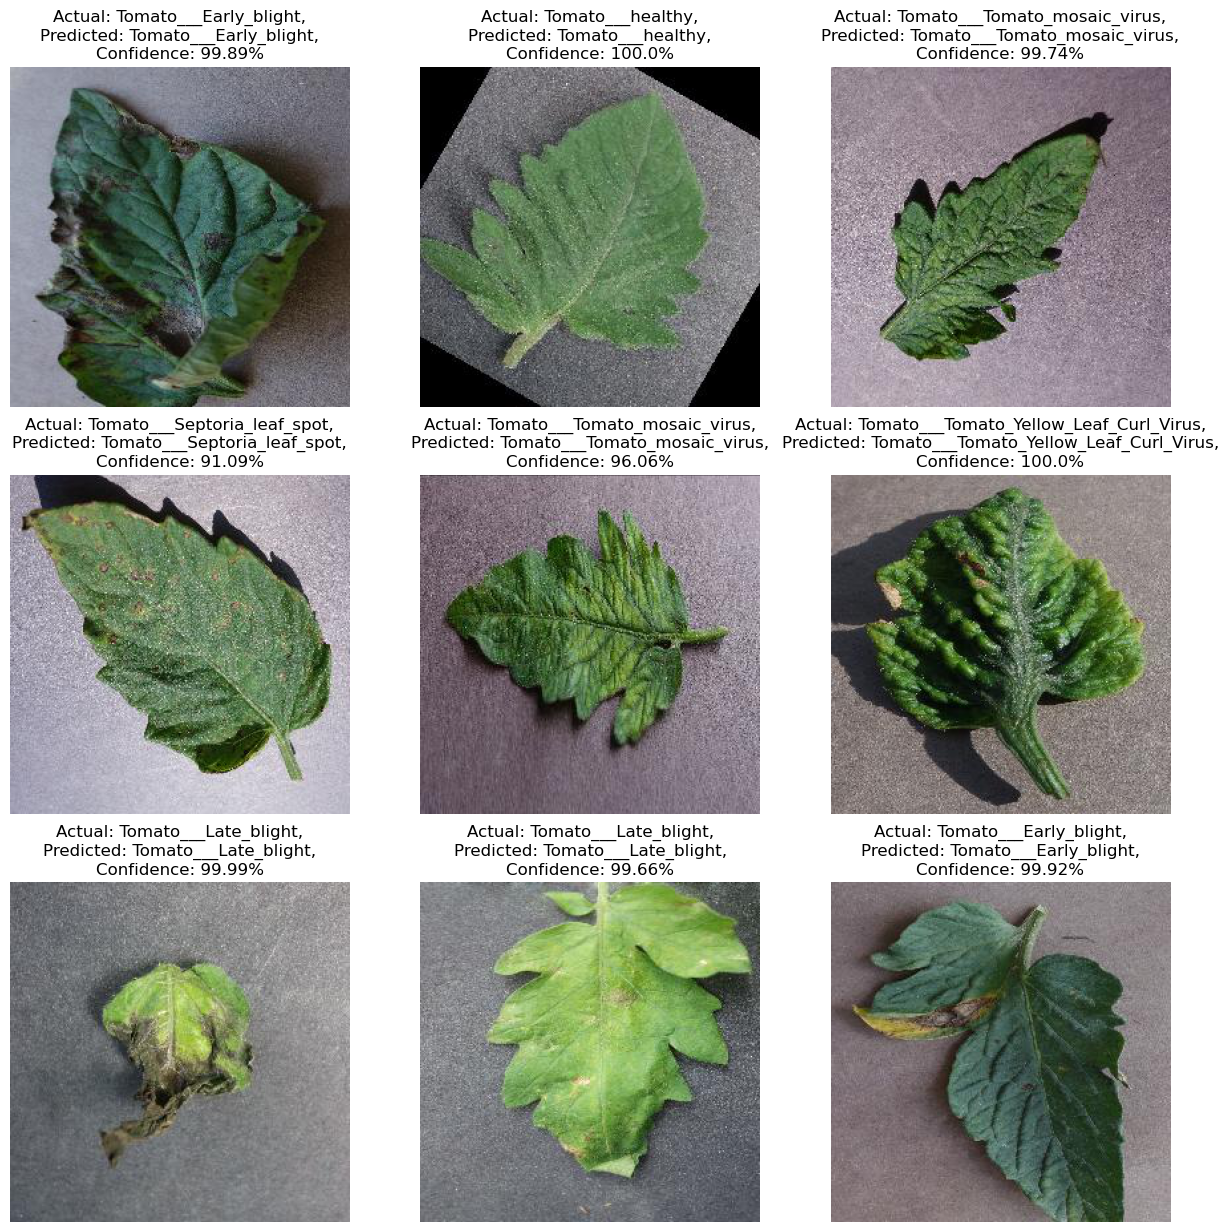

In [11]:
# Plotting predictions on test images
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}%")
        plt.axis("off")
    break

In [12]:
# Save the model
model.save("potatoes.keras")